## Face expression Recognition
* import os and get the current working directory

In [1]:
import os
os.getcwd()

'C:\\Users\\saite\\Desktop\\Face-Expression-Detection'

* Let's assign the dataset path to the basepath

In [4]:
base_path = "C:\\Users\\saite\\Desktop\\Face-Expression-Detection\\Images\\images"


* Get the number of images of each class in train dataset

In [5]:
# count number of train images for each expression

for expression in os.listdir(base_path + "\\train"):
    print(str(len(os.listdir(base_path + "\\train\\" + expression))) + " " + expression + " images")

3988 angry images
436 disgust images
4103 fear images
7164 happy images
4982 neutral images
4938 sad images
3205 surprise images


* we have good amount of images for each class except for the class disgust. 
* pic_size for the images is (48,48)

In [7]:
pic_size =48

#### Train Validation Generator
* The color of the images are gray
* consider the batch size 128
* Shuffle the data for each generator

In [9]:
from keras.preprocessing.image import ImageDataGenerator

datagen_train = ImageDataGenerator()
datagen_validation = ImageDataGenerator()

train_generator = datagen_train.flow_from_directory(base_path + "\\train",
                                                    target_size=(pic_size,pic_size),
                                                    color_mode="grayscale",
                                                    batch_size=128,
                                                    class_mode='categorical',
                                                    shuffle=True)

validation_generator = datagen_validation.flow_from_directory(base_path + "\\validation",
                                                    target_size=(pic_size,pic_size),
                                                    color_mode="grayscale",
                                                    batch_size=128,
                                                    class_mode='categorical',
                                                    shuffle=True)


Using TensorFlow backend.


Found 28816 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


In [11]:
validation_generator

## Model Building
* import libraries
* build architecture
* compile the model
* train on the train data

In [7]:
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.optimizers import Adam
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
import tensorflow as tf

import keras.backend as K
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

%matplotlib inline

In [104]:
input_shape = (48,48,1)
X_input = Input(input_shape)


# CONV -> BN -> RELU Block applied to X
X = Conv2D(64, (3, 3), strides = (1, 1),padding='same', name = 'conv0')(X_input)
X = BatchNormalization(axis = 3, name = 'bn0')(X)
X = Activation('relu')(X)

# MAXPOOL
X = MaxPooling2D((2, 2), name='max_pool0')(X)
X = Dropout(0.25)(X)


# CONV -> BN -> RELU Block applied to X
X = Conv2D(256, (5, 5) , strides = (1, 1),padding='same', name = 'conv1')(X)
X = BatchNormalization(axis = 3, name = 'bn1')(X)
X = Activation('relu')(X)

# MAXPOOL
X = MaxPooling2D((2, 2), name='max_pool1')(X)
X = Dropout(0.25)(X)


# CONV -> BN -> RELU Block applied to X
X = Conv2D(512, (5, 5), strides = (1, 1),padding='same', name = 'conv2')(X)
X = BatchNormalization(axis = 3, name = 'bn2')(X)
X = Activation('relu')(X)

# MAXPOOL
X = MaxPooling2D((2, 2), name='max_pool2')(X)
X = Dropout(0.25)(X)

# CONV -> BN -> RELU Block applied to X
X = Conv2D(512, (3, 3), strides = (1, 1),padding='same', name = 'conv3')(X)
X = BatchNormalization(axis = 3, name = 'bn3')(X)
X = Activation('relu')(X)

# MAXPOOL
X = MaxPooling2D((2, 2), name='max_pool3')(X)
X = Dropout(0.25)(X)




# FLATTEN X (means convert it to a vector) + FULLYCONNECTED
X = Flatten()(X)
X = Dense(256, name='fc')(X)
X = BatchNormalization(name = 'bn4')(X)
X = Activation('relu')(X)
X = Dropout(0.25)(X)

X = Dense(512, name='fc2')(X)
X = BatchNormalization(name = 'bn5')(X)
X = Activation('relu')(X)
X = Dropout(0.25)(X)

X = Dense(7, activation='softmax', name='fc3')(X)

# Create model. This creates your Keras model instance, you'll use this instance to train/test the model.
model = Model(inputs = X_input, outputs = X)

In [106]:
model.compile(optimizer=Adam(lr = 0.0001), loss='categorical_crossentropy', metrics=['accuracy'])


In [107]:
%%time



history = model.fit_generator(generator=train_generator,
                                steps_per_epoch=train_generator.n//train_generator.batch_size,
                                epochs=50,
                                validation_data = validation_generator,
                                validation_steps = validation_generator.n//validation_generator.batch_size,
                                )

Epoch 1/50
225/225 [==============================] - 20s 88ms/step - loss: 1.9837 - accuracy: 0.2490 - val_loss: 1.6888 - val_accuracy: 0.3426
Epoch 2/50
225/225 [==============================] - 19s 86ms/step - loss: 1.8038 - accuracy: 0.3082 - val_loss: 1.6201 - val_accuracy: 0.3754
Epoch 3/50
225/225 [==============================] - 20s 90ms/step - loss: 1.6933 - accuracy: 0.3532 - val_loss: 1.5545 - val_accuracy: 0.4092
Epoch 4/50
225/225 [==============================] - 20s 88ms/step - loss: 1.6119 - accuracy: 0.3833 - val_loss: 1.4922 - val_accuracy: 0.4251
Epoch 5/50
225/225 [==============================] - 20s 87ms/step - loss: 1.5446 - accuracy: 0.4081 - val_loss: 1.5686 - val_accuracy: 0.4173
Epoch 6/50
225/225 [==============================] - 21s 91ms/step - loss: 1.4882 - accuracy: 0.4278 - val_loss: 1.4231 - val_accuracy: 0.4482
Epoch 7/50
225/225 [==============================] - 20s 87ms/step - loss: 1.4260 - accuracy: 0.4516 - val_loss: 1.3754 - val_accuracy:

## Accuracy and Loss Curves

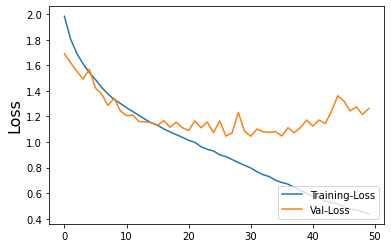

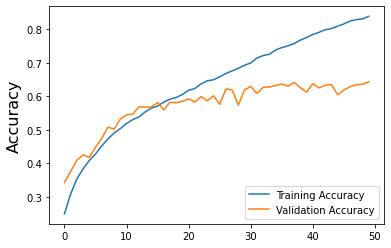

In [113]:
plt.ylabel('Loss', fontsize=10)
plt.plot(history.history['loss'], label='Training-Loss')
plt.plot(history.history['val_loss'], label='Val-Loss')
plt.legend(loc='lower right')
plt.show()
plt.ylabel('Accuracy', fontsize=10)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [111]:
model.evaluate_generator(generator =validation_generator)

[1.2632040977478027, 0.6430795192718506]